In [151]:
import sklearn,math, itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
import time


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [152]:
data = pd.read_csv("evaluations.csv")


#dropping outliers (3 std above mean)
#dropping draws
#boolean variables?
#dropping opening and endgame
#visualize distributions
#balance classes => makes predicitons equal 



In [153]:

# for col in data.columns:
#     if col[0]=="B":
#         data[col] = -1 * data[col]
# data.describe()


In [154]:
feature_cols = data.columns[4:]
print(len(data))

###########
#handling outliers
###########
# clean_cols = []
# for col in feature_cols:
#     if col[0] !="D":
#         clean_cols.append(col)
# clean_cols.append("total moves")
# for col in clean_cols:
#     std = data[col].std()
#     avg = data[col].mean()
#     upper = avg + (3 * std)
#     lower = avg - (3 * std)
#     data = data[data[col] < upper]
#     data = data[data[col] > lower]

# print(len(data))
# data.describe()

404744


In [155]:
##dropping duplicate fens, keeping one
len(data[data["fen"].duplicated()]["fen"].unique())
data = data.drop_duplicates(subset=['fen'], keep='last')
len(data)

353261

In [156]:
total = len(data)
# print(len(data))
# data = data[data["winner"] != "Draw"]
# print(len(data))


# data = data[data["move number"] > 5]
# # print(len(clean_data)/total)
# data = data[(data["move number"] / data["total moves"]) < 0.8]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["total moves"] < 200]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["total moves"] > 20]
# print(len(clean_data)/total)

# data = clean_data.sample(10000)

# data_winning = data[data["winner"]=="White"]
# data_not_winning = data[data["winner"]!="White"]

# data_winning = data_winning.sample(10000)
# data_not_winning = data_not_winning.sample(10000)

# data = data_winning.append(data_not_winning)
# data = data.reset_index(drop=True)


# data = clean_data

In [157]:
data

,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
11,r1bqk2r/4np1p/p2p1p2/1p2p3/4P3/N1P5/PP1Q1PPP/R...,Black,5,78,32,3,3202,0,4,1,...,-3197,0,-5,0,-28,0,-1,0,0,-1
12,r2qk2r/1b2np1p/p2p1p2/1p2p3/4P3/N1P5/PP1Q1PPP/...,Black,17,78,32,3,3202,0,4,1,...,-3226,-1,-6,0,-36,0,-1,0,-1,-1
13,r2qk2r/1b2np1p/p2p1p2/1p2p3/4P3/N1P5/PP1Q1PPP/...,Black,12,78,32,3,3242,0,4,1,...,-3226,-1,-6,0,-30,0,-1,0,-1,-1
14,r2qk2r/4np1p/p2Q1p2/1p2p3/4b3/N1P5/PP3PPP/2KR1...,Black,63,78,31,3,3149,0,3,1,...,-3176,-1,-7,0,-35,0,-1,0,-10,-1
15,r3k2r/4np1p/p2q1p2/1p2p3/4b3/N1P5/PP3PPP/2KR1B...,Black,61,78,22,3,2116,0,2,1,...,-3164,-1,-7,0,-24,0,-1,0,-9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404739,1R5Q/7r/3p2pk/p1n1p2p/P1P1Pp1q/2B2P1P/6P1/3Bb2...,Draw,63,82,26,2,2833,2,6,0,...,-2590,0,-5,0,-37,0,-1,-1,-15,-1
404740,1R3Q2/7r/3p2pk/p1n1p2p/P1P1Pp1q/2B2P1P/6P1/3Bb...,Draw,25,82,26,2,2832,1,6,0,...,-2590,0,-5,0,-2,0,-1,-1,-6,-1
404741,1R3Q2/6r1/3p2pk/p1n1p2p/P1P1Pp1q/2B2P1P/6P1/3B...,Draw,4,82,26,2,2832,1,6,0,...,-2655,0,-5,0,-38,0,-1,-1,-6,-1
404742,1R6/6r1/3Q2pk/p1n1p2p/P1P1Pp1q/2B2P1P/6P1/3Bb2...,Draw,14,82,26,2,2796,1,6,0,...,-2583,0,-4,0,-30,0,-1,-1,-6,-1


In [158]:
data_win = data[data["winner"] == "White"]
print(len(data_win))
data_lose = data[data["winner"] == "Black"]
print(len(data_lose))
data_draw = data[data["winner"] == "Draw"]
print(len(data_draw))

data_win = data_win.sample(100_000)

data_lose = data_lose.sample(100_000)

data = data_win.append(data_lose)
data

133539
103474
116248


,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
152009,4rrk1/pp4pp/1qnb4/3p1bNQ/3Pp3/2N1B2P/PP3PP1/R4...,White,10,71,34,3,3593,0,6,0,...,-3641,0,-7,0,-43,-1,-1,0,-3,-1
127860,3r1k1r/1pp3pp/1p3R2/4p3/4P3/1B1P2Q1/PqP3PP/5RK...,White,29,53,28,3,2909,0,5,1,...,-2403,-1,-5,0,-3,0,-1,0,-11,-1
305435,rnbqkbnr/ppppp1p1/7p/5p2/3P3B/8/PPP1PPPP/RN1QK...,White,14,77,39,1,3945,0,4,0,...,-3884,0,-1,0,-19,-1,0,0,0,-1
237748,r1bqk2r/pppp1ppp/2n2n2/1B1Np3/1b2P3/5N2/PPPP1P...,White,37,47,39,1,4051,0,7,0,...,-4010,0,-6,0,-31,-1,0,-1,-5,-1
12313,6k1/p4p2/2b1rBp1/5p1p/8/5P1P/P2Q2P1/7K w - - 2 38,White,5,89,16,2,1778,1,4,1,...,-1297,-1,-3,0,-39,0,-1,0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251132,4r3/1pp2ppp/8/P1k1P3/1p1NbPP1/1P5P/2P5/3R2K1 w...,Black,41,80,15,2,1431,0,6,1,...,-1392,-1,-5,0,-23,0,-1,0,-5,0
68282,8/1p6/p7/2p5/3p2kb/1P1P4/1PP1K3/2R1N2r b - - 1...,Black,14,122,12,1,1048,0,1,0,...,-1186,0,-3,-1,-22,0,-1,0,-3,0
116725,r7/p2q1pkp/6p1/8/2p5/1PpPrQ2/P1K2PPP/R7 w - - ...,Black,17,54,20,3,1960,1,2,1,...,-2512,0,-4,0,-38,0,-1,0,-11,-1
230361,rn2kb1r/p3pp1p/b1p2np1/3qN3/PppP4/4P1N1/1P2BPP...,Black,18,100,38,2,4012,0,7,1,...,-3976,-1,-6,0,-32,-1,0,0,-5,-1


In [159]:
data.describe()

,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,47.541810,96.085505,25.98528,2.054070,2693.792690,0.364250,4.732010,0.142715,31.542020,0.388260,...,-2684.992575,-0.440825,-4.12698,-0.122205,-31.542020,-0.386265,-0.879210,-0.150855,-3.644285,-0.687035
std,34.147101,34.385129,10.42867,0.701811,1117.902369,0.571029,2.006228,0.366399,11.512151,0.487355,...,1110.956987,0.591422,1.79518,0.342274,11.512151,0.486894,0.325884,0.690160,3.354589,0.464380
min,0.000000,10.000000,0.00000,0.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4647.000000,-3.000000,-12.00000,-3.000000,-68.000000,-1.000000,-1.000000,-14.000000,-26.000000,-2.000000
25%,21.000000,72.000000,17.00000,2.000000,1749.000000,0.000000,3.000000,0.000000,26.000000,0.000000,...,-3651.000000,-1.000000,-5.00000,0.000000,-39.000000,-1.000000,-1.000000,0.000000,-5.000000,-1.000000
50%,42.000000,90.000000,28.00000,2.000000,2929.000000,0.000000,5.000000,0.000000,34.000000,0.000000,...,-2921.000000,0.000000,-4.00000,0.000000,-34.000000,0.000000,-1.000000,0.000000,-3.000000,-1.000000
75%,67.000000,115.000000,35.00000,2.000000,3668.000000,1.000000,6.000000,0.000000,39.000000,1.000000,...,-1743.000000,0.000000,-3.00000,0.000000,-26.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
max,318.000000,322.000000,44.00000,4.000000,4747.000000,3.000000,12.000000,3.000000,68.000000,1.000000,...,54.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [160]:
feature_cols = data.columns[4:]

target = data["winner"] != "Black"
features = data[feature_cols]
scaler =  MinMaxScaler()
features_transformed = scaler.fit_transform(features)
features = pd.DataFrame(features_transformed, columns=features.columns)









x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.15)

In [161]:
len(feature_cols)

36

In [162]:
# fig, axs = plt.subplots(9, 4, figsize=(100, 100))

# for i in range(len(feature_cols)):
#     sns.distplot(features[feature_cols[i]], ax=axs.flat[i])
# #     sns.distplot(features[plot_cols[i]])
# plt.show()

In [163]:

# from sklearn.feature_selection import RFE
# # X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# # estimator = DecisionTreeClassifier(max_depth=5)
# estimator = sklearn.ensemble.ExtraTreesClassifier(n_estimators=300, n_jobs=-1)
# # estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=50, verbose=2)
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector = selector.fit(x_train, y_train)
# selector.support_
# print(selector.ranking_)
# new_features = []
# support = selector.support_
# for i in range(len(features.columns)):
#     if support[i]:
#         new_features.append(features.columns[i])
# print(new_features)

# features_transformed = features[new_features]
# x_train, x_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.25, random_state=0)

In [164]:
x_train.describe()

,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,W_not all pawns,W_pinned evaluation,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,...,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000,170000.000000
mean,0.590502,0.513582,0.573243,0.121398,0.394233,0.047645,0.463931,0.387741,0.882718,0.010948,...,0.417448,0.853016,0.656127,0.959239,0.536069,0.614376,0.121212,0.989237,0.859670,0.656468
std,0.236909,0.175592,0.232188,0.190426,0.167166,0.122229,0.169363,0.487236,0.321757,0.049568,...,0.236222,0.197232,0.149689,0.114161,0.169363,0.486744,0.326374,0.049246,0.129113,0.232200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.083174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386364,0.500000,0.377390,0.000000,0.250000,0.000000,0.382353,0.000000,1.000000,0.000000,...,0.211870,0.666667,0.583333,1.000000,0.426471,0.000000,0.000000,1.000000,0.807692,0.500000
50%,0.636364,0.500000,0.621987,0.000000,0.416667,0.000000,0.500000,0.000000,1.000000,0.000000,...,0.367369,1.000000,0.666667,1.000000,0.500000,1.000000,0.000000,1.000000,0.884615,0.500000
75%,0.795455,0.500000,0.775769,0.333333,0.500000,0.000000,0.573529,1.000000,1.000000,0.000000,...,0.617315,1.000000,0.750000,1.000000,0.617647,1.000000,0.000000,1.000000,0.961538,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)


def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=17, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
    return model

In [166]:
# estimator = KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=10, verbose=2)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, x_train, y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [167]:
# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
#     ('svr', make_pipeline(StandardScaler(),
#                           LinearSVC(random_state=42)))
# ]
# clf = StackingClassifier(
#     estimators=estimators, final_estimator=LogisticRegression()
# )
# plit

# clf.fit(X_train, y_train).score(X_test, y_test)

In [168]:
# estimator = KerasClassifier(build_fn=create_baseline, epochs=500, batch_size=50, verbose=2)

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
# estimator_lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200)
# estimator_rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_features=None, verbose = 1)
estimator_et = sklearn.ensemble.ExtraTreesClassifier(n_estimators=13, n_jobs=-1, max_features=None)
estimator_nn = KNeighborsClassifier()
estimators = [("lr",estimator_lr), ("rf", estimator_rf), ("et",estimator_et), ("nn", estimator_nn)]

# clf = StackingClassifier(
#     estimators=estimators, final_estimator=LogisticRegression(solver='saga', tol=1e-2, max_iter=200), n_jobs = -1
# )
clf = estimator_et
clf.fit(x_train, y_train)

ExtraTreesClassifier(max_features=None, n_estimators=13, n_jobs=-1)

In [169]:
# import pickle
# s = pickle.dumps(clf)
# clf2 = pickle.loads(s)
# # clf2.predict(x_)

# y[0]

In [170]:
from joblib import dump, load
dump(clf, 'clf_superlite.joblib') 

['clf_superlite.joblib']

In [171]:
# kfold = KFold(n_splits=10, shuffle=True)



# scores = cross_val_score(estimator=, X=x_train, y=y_train, cv=kfold)

# scores.mean()


In [172]:
# x = [ not val for val in y_train]

# sum(x)/len(y_train)

In [173]:
estimator = clf
train_acc = estimator.score(x_train, y_train)
print(train_acc)

0.9987058823529412


In [174]:
assert len(x_train) + len(x_test) == len(data) == len(features)

In [175]:
len(features)

200000

In [176]:
test_acc = estimator.score(x_test, y_test)
print(test_acc)

0.7877333333333333


In [177]:
((len(x_train) * train_acc) + (len(x_test) * test_acc))/ len(data)

0.96706

In [178]:
y_pred = estimator.predict(x_test)
y_true = list(y_test)

Normalized confusion matrix


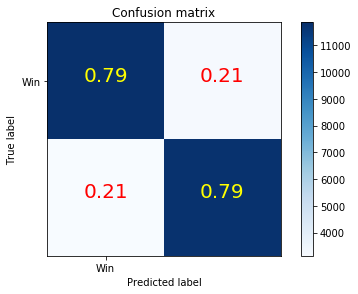

In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
plot_confusion_matrix(metrics.confusion_matrix(y_true, y_pred), classes=["Win"])

In [180]:
scaler =  MinMaxScaler()
draws = data_draw[feature_cols]
draws_transformed = scaler.fit_transform(draws)
features_draw = pd.DataFrame(features_transformed, columns=features.columns)


In [181]:
sum(estimator.predict(features_draw))/len(features)

0.49953

In [182]:
def matrix_metrix(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN + FN + TP + FP
    Prevalence = round((TP + FP) / Population, 3)
    Accuracy = round((TP + TN) / Population, 3)
    Precision = round(TP / (TP + FP), 3)
    NPV = round(TN / (TN + FN), 3)
    FDR = round(FP / (TP + FP), 3)
    FOR = round(FN / (TN + FN), 3)
    check_Pos = Precision + FDR
    check_Neg = NPV + FOR
    Recall = round(TP / (TP + FN), 3)
    FPR = round(FP / (TN + FP), 3)
    Specificity = 1 - FPR
    FNR = round(FN / (TP + FN), 3)
    TNR = round(TN / (TN + FP), 3)
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos = round(Recall / FPR, 3)
    LRNeg = round(FNR / TNR, 3)
    DOR = round(LRPos / LRNeg)
    F1 = round(2 * ((Precision * Recall) / (Precision + Recall)), 4)
    F2 = round((1 + 2 ** 2) * ((Precision * Recall) / ((2 ** 2 * Precision) + Recall)), 4)
    MCC = -1
#     MCC = round(((TP * TN) - (FP * FN)) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)), 4)
    BM = Recall + TNR - 1
    MK = Precision + NPV - 1
#     AUC = round(metrics.roc_auc_score(y_true, prediction), 3)

    met_dict = {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'Prevalence': Prevalence,
        'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall,
        'F1': F1, 'F2': F2,
        # 'AUC':AUC,
        'NPV': NPV, 'FPR': FPR,
        'TNR': Specificity, 'FNR': FNR, 'TNR': TNR, 'FDR': FDR, 'FOR': FOR, 'check_Pos': check_Pos,
        'check_Neg': check_Neg, 'check_Pos2': check_Pos2, 'check_Neg2': check_Neg2, 'LR+': LRPos,
        'LR-': LRNeg, 'DOR': DOR, 'MCC': MCC, 'BM': BM, 'MK': MK
    }

    return met_dict
matrix_metrix(y_true, y_pred)

{'TP': 11772,
 'TN': 11860,
 'FP': 3234,
 'FN': 3134,
 'Prevalence': 0.5,
 'Accuracy': 0.788,
 'Precision': 0.784,
 'Recall': 0.79,
 'F1': 0.787,
 'F2': 0.7888,
 'NPV': 0.791,
 'FPR': 0.214,
 'TNR': 0.786,
 'FNR': 0.21,
 'FDR': 0.216,
 'FOR': 0.209,
 'check_Pos': 1.0,
 'check_Neg': 1.0,
 'check_Pos2': 1.0,
 'check_Neg2': 1.0,
 'LR+': 3.692,
 'LR-': 0.267,
 'DOR': 14.0,
 'MCC': -1,
 'BM': 0.5760000000000001,
 'MK': 0.5750000000000002}

In [183]:
# def acc_with_thresh(x=x_test, y=y_true, thresh=0.9):
#     probs = estimator.predict_proba(x_test)
#     n = len(x)
#     assert n == len(y)
#     total = 0

#     for i in range(n):
#         prediction = probs[i][1] >= thresh
#         print(probs[i][1], prediction, y_true[i])
#         if prediction == y_true[i]:
#             total+=1
#     return total/n

In [184]:
data

,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
152009,4rrk1/pp4pp/1qnb4/3p1bNQ/3Pp3/2N1B2P/PP3PP1/R4...,White,10,71,34,3,3593,0,6,0,...,-3641,0,-7,0,-43,-1,-1,0,-3,-1
127860,3r1k1r/1pp3pp/1p3R2/4p3/4P3/1B1P2Q1/PqP3PP/5RK...,White,29,53,28,3,2909,0,5,1,...,-2403,-1,-5,0,-3,0,-1,0,-11,-1
305435,rnbqkbnr/ppppp1p1/7p/5p2/3P3B/8/PPP1PPPP/RN1QK...,White,14,77,39,1,3945,0,4,0,...,-3884,0,-1,0,-19,-1,0,0,0,-1
237748,r1bqk2r/pppp1ppp/2n2n2/1B1Np3/1b2P3/5N2/PPPP1P...,White,37,47,39,1,4051,0,7,0,...,-4010,0,-6,0,-31,-1,0,-1,-5,-1
12313,6k1/p4p2/2b1rBp1/5p1p/8/5P1P/P2Q2P1/7K w - - 2 38,White,5,89,16,2,1778,1,4,1,...,-1297,-1,-3,0,-39,0,-1,0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251132,4r3/1pp2ppp/8/P1k1P3/1p1NbPP1/1P5P/2P5/3R2K1 w...,Black,41,80,15,2,1431,0,6,1,...,-1392,-1,-5,0,-23,0,-1,0,-5,0
68282,8/1p6/p7/2p5/3p2kb/1P1P4/1PP1K3/2R1N2r b - - 1...,Black,14,122,12,1,1048,0,1,0,...,-1186,0,-3,-1,-22,0,-1,0,-3,0
116725,r7/p2q1pkp/6p1/8/2p5/1PpPrQ2/P1K2PPP/R7 w - - ...,Black,17,54,20,3,1960,1,2,1,...,-2512,0,-4,0,-38,0,-1,0,-11,-1
230361,rn2kb1r/p3pp1p/b1p2np1/3qN3/PppP4/4P1N1/1P2BPP...,Black,18,100,38,2,4012,0,7,1,...,-3976,-1,-6,0,-32,-1,0,0,-5,-1


In [185]:
new_data  = pd.read_csv("evaluations.csv")
x_new = new_data[data.columns[4:]]
x_new
y_true_new = list(new_data["winner"] == "White")

In [186]:
scaler =  MinMaxScaler()
new_data = scaler.fit_transform(x_new)
new_data = pd.DataFrame(new_data, columns=features.columns)

In [187]:
# y_pred_new = list(estimator.predict(new_data))

In [188]:
estimator.score(new_data, y_true_new) #factoring in draws its correct 50% of the time with draws

0.7457874607159093

In [189]:
#next steps
#get more data, actually have a good test set

#save model 
#agent: max over proabbilities
#build an agent
#figure out how to elo
#play vs random agent, play vs stockfish 8, play vs medium


In [190]:
clf_loaded = load('filename.joblib') 

In [191]:
clf_loaded.score(x_test, y_test)

0.9552333333333334